In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Lendo dataset

In [2]:
columns = ['sepal_comprimento','sepal_largura','petal_comprimento','petal_largura','tipo']
df = pd.read_csv('iris-dataset.csv',names=columns);

### Analisando informações

In [3]:
df.head()

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura,tipo
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_comprimento    150 non-null float64
sepal_largura        150 non-null float64
petal_comprimento    150 non-null float64
petal_largura        150 non-null float64
tipo                 150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
df.describe()

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df['tipo'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: tipo, dtype: int64

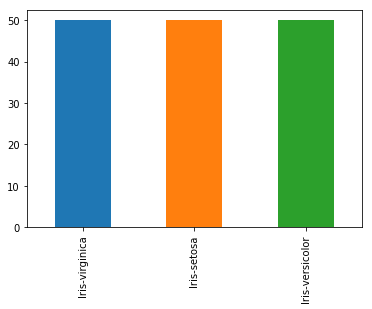

In [7]:
df['tipo'].value_counts().plot(kind='bar');

### transformando label em um float

In [8]:
df['tipo'] = np.where(df['tipo'] == 'Iris-setosa', 0,df['tipo'])
df['tipo'] = np.where(df['tipo'] == 'Iris-versicolor', 1,df['tipo'])
df['tipo'] = np.where(df['tipo'] == 'Iris-virginica', 2,df['tipo'])

### Separando features e labols

In [9]:
X = df.values[:, :-1]
y = df.values[:, -1]

### Separando train e test

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.9, random_state=42, stratify=y);

### Estandartizando os dados

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
stand = StandardScaler()

Convertendo features para float64 para realizar a standatização

In [14]:
X_train = np.float64(X_train)
X_test = np.float64(X_test)

Estandartizando

In [15]:
X_train_std = stand.fit_transform(X_train);
X_test_std = stand.transform(X_test);

# Criando modelos

#### Definindo K

In [16]:
k = [1, 3 , 5]

In [17]:
from ml_lib import knn

In [18]:
from importlib import reload

In [19]:
reload(knn)

<module 'ml_lib.knn' from '/home/michel/Documentos/Machine-Learning/Lista 9/ml_lib/knn.py'>

#### Definindo vedor de y_pred

In [20]:
y_pred = {}
y_pred['euclidean'] = {1:[],3:[],5:[]}
y_pred['manhattan'] = {1:[],3:[],5:[]}
y_pred['chebyshev'] = {1:[],3:[],5:[]}
y_pred['minkowski'] = {1:[],3:[],5:[]}

#### Distancia Euclidean

In [21]:
modelKNN = knn.KNN(dist='euclidean')

In [22]:
for n in k:
    for i in range(X_test_std.shape[0]):
        y_pred['euclidean'][n].append(modelKNN.classifica(X_train_std,y_train,X_test_std[i],n))
    y_pred['euclidean'][n] = np.array(y_pred['euclidean'][n])

#### Distancia Manhattan

In [23]:
modelKNN = knn.KNN(dist='manhattan')

In [24]:
for n in k:
    for i in range(X_test_std.shape[0]):
        y_pred['manhattan'][n].append(modelKNN.classifica(X_train_std,y_train,X_test_std[i],n))
    y_pred['manhattan'][n] = np.array(y_pred['manhattan'][n])

#### Distancia Chebyshev

In [25]:
modelKNN = knn.KNN(dist='chebyshev')

In [26]:
for n in k:
    for i in range(X_test_std.shape[0]):
        y_pred['chebyshev'][n].append(modelKNN.classifica(X_train_std,y_train,X_test_std[i],n))
    y_pred['chebyshev'][n] = np.array(y_pred['chebyshev'][n])

#### Distancia Minkowski

In [27]:
modelKNN = knn.KNN(dist='minkowski')

In [28]:
for n in k:
    for i in range(X_test_std.shape[0]):
        y_pred['minkowski'][n].append(modelKNN.classifica(X_train_std,y_train,X_test_std[i],n))
    y_pred['minkowski'][n] = np.array(y_pred['minkowski'][n])

### KNN sklearn

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
modelKNN_skl = KNeighborsClassifier(n_neighbors=1)

Predições Sklearn

In [31]:
y_pred_sk = {}
y_pred_sk['euclidean'] = {1:[],3:[],5:[]}
y_pred_sk['manhattan'] = {1:[],3:[],5:[]}
y_pred_sk['chebyshev'] = {1:[],3:[],5:[]}
y_pred_sk['minkowski'] = {1:[],3:[],5:[]}

#### Distancia Euclidean

In [32]:
for i in k:
    modelKNN_skl = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    modelKNN_skl.fit(X_train_std,np.float64(y_train));
    y_pred_sk['euclidean'][i] = modelKNN_skl.predict(X_test_std);

#### Distancia Manhattan

In [33]:
for i in k:
    modelKNN_skl = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    modelKNN_skl.fit(X_train_std,np.float64(y_train));
    y_pred_sk['manhattan'][i] = modelKNN_skl.predict(X_test_std);

#### Distancia Chebyshev

In [34]:
for i in k:
    modelKNN_skl = KNeighborsClassifier(n_neighbors=i, metric='chebyshev')
    modelKNN_skl.fit(X_train_std,np.float64(y_train));
    y_pred_sk['chebyshev'][i] = modelKNN_skl.predict(X_test_std);

#### Distancia Minkowski

In [35]:
for i in k:
    modelKNN_skl = KNeighborsClassifier(n_neighbors=i, metric='minkowski',p=2)
    modelKNN_skl.fit(X_train_std,np.float64(y_train));
    y_pred_sk['minkowski'][i] = modelKNN_skl.predict(X_test_std);

# Metricas

In [36]:
from sklearn import metrics

In [37]:
accuracy_knn = ['euclidean','manhattan','chebyshev','minkowski']

## Implementação Pessoal

In [38]:
print("--------------------------------------")
print('|          Metrica Accuracy          |')
print("--------------------------------------")
for i in k:
    print('|               K ->',i,'              |')
    print("--------------------------------------")
    for m in accuracy_knn:
        print('|',m," | ",metrics.accuracy_score(np.int64(y_test),y_pred[m][i]),'  |')
        print("--------------------------------------")

--------------------------------------
|          Metrica Accuracy          |
--------------------------------------
|               K -> 1               |
--------------------------------------
| euclidean  |  0.9555555555555556   |
--------------------------------------
| manhattan  |  0.9555555555555556   |
--------------------------------------
| chebyshev  |  0.3333333333333333   |
--------------------------------------
| minkowski  |  0.9555555555555556   |
--------------------------------------
|               K -> 3               |
--------------------------------------
| euclidean  |  0.8888888888888888   |
--------------------------------------
| manhattan  |  0.9259259259259259   |
--------------------------------------
| chebyshev  |  0.3333333333333333   |
--------------------------------------
| minkowski  |  0.8888888888888888   |
--------------------------------------
|               K -> 5               |
--------------------------------------
| euclidean  |  0.8814814

## Sklearn

In [39]:
print("--------------------------------------")
print('|          Metrica Accuracy          |')
print("--------------------------------------")
for i in k:
    print('|               K ->',i,'              |')
    print("--------------------------------------")
    for m in accuracy_knn:
        print('|',m," | ",metrics.accuracy_score(np.int64(y_test),y_pred_sk[m][i]),'  |')
        print("--------------------------------------")

--------------------------------------
|          Metrica Accuracy          |
--------------------------------------
|               K -> 1               |
--------------------------------------
| euclidean  |  0.9555555555555556   |
--------------------------------------
| manhattan  |  0.9555555555555556   |
--------------------------------------
| chebyshev  |  0.9111111111111111   |
--------------------------------------
| minkowski  |  0.9555555555555556   |
--------------------------------------
|               K -> 3               |
--------------------------------------
| euclidean  |  0.8888888888888888   |
--------------------------------------
| manhattan  |  0.9259259259259259   |
--------------------------------------
| chebyshev  |  0.7851851851851852   |
--------------------------------------
| minkowski  |  0.8888888888888888   |
--------------------------------------
|               K -> 5               |
--------------------------------------
| euclidean  |  0.8814814